<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/BeltExam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras import losses
from keras import metrics
from keras import models
from keras import layers

### **Part 1 Clustering**

**Data Exploration and Cleansing**

In [371]:
#import data
df1 = pd.read_csv('/content/option_A_clustering_df - option_A_clustering_df.csv')
df1.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [372]:
#check info about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

In [373]:
#check duplicates
duplicates = df1.duplicated().sum()
if duplicates > 0:
  print('Our data has duplicates that need to be cleaned')

Our data has duplicates that need to be cleaned


In [374]:
#remove duplicates
df1.drop_duplicates(inplace=True)

In [375]:
#confirm duplicates have been removed
duplicates1 = df1.duplicated().sum()
if duplicates1 == 0:
  print('There are no more duplicates in our data')

There are no more duplicates in our data


In [376]:
#check data info after removing duplicates
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   int64  
 1   SqFt1stFloor        4915 non-null   int64  
 2   SqFtHalfFloor       4915 non-null   int64  
 3   SqFt2ndFloor        4915 non-null   int64  
 4   SqFtUpperFloor      4915 non-null   int64  
 5   SqFtTotLiving       4915 non-null   int64  
 6   SqFtTotBasement     4915 non-null   int64  
 7   SqFtFinBasement     4915 non-null   int64  
 8   SqFtGarageBasement  4915 non-null   int64  
 9   SqFtGarageAttached  4915 non-null   int64  
 10  DaylightBasement    4915 non-null   int64  
 11  SqFtOpenPorch       4915 non-null   int64  
 12  SqFtEnclosedPorch   4915 non-null   int64  
 13  SqFtDeck            4915 non-null   int64  
 14  BrickStone          4915 non-null   int64  
 15  Bedrooms            4915 non-null   int64  
 16  BathHa

In [377]:
#check null values
df1.isnull().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

There are no null values

**Preparing the Dataset for Modeling and Model Analysis**

In [378]:
#scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

In [379]:
#fit the Kmeans algo
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

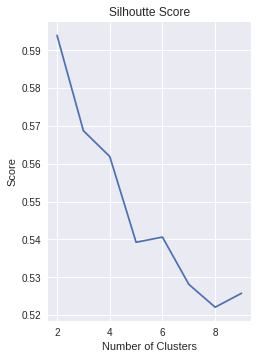

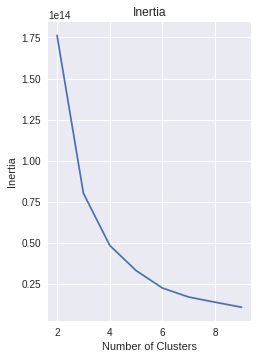

In [380]:
#Visualizing silhouette score and inertia for kmeans
score_km = [] #list to store silhoutte score
ini_km = [] #list to store intertia score
k_range = range(2, 10)
for i in k_range:
  kmeans_m = KMeans(n_clusters=i)
  kmeans_m.fit(df1)
  score_km.append(silhouette_score(df1, kmeans_m.labels_))
  ini_km.append(kmeans_m.inertia_)

#visualize scores

plt.style.use('seaborn')

plt.subplot(1,2,1)
plt.plot(range(2, 10), score_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhoutte Score')
plt.show()

plt.subplot(1,2,2)
plt.plot(range(2, 10), ini_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia')
plt.show()

From the visualization, highest silhouette score for kmeans seems to be when n_clusters = 2. However, inertia seems to level-off (or we have an 'elbow') when n_cluster = 3. I'll however go with 2 clusters rather than 3, in order to ensure the model maximizes the silhoutte score.

In [381]:
#refit model with n_cluster = 2
km = KMeans(n_clusters=2)
km.fit(scaled_data)

KMeans(n_clusters=2)

In [382]:
#create a column for the cluster labels in the dataset
df1['cluster'] = km.labels_ 

In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   int64  
 1   SqFt1stFloor        4915 non-null   int64  
 2   SqFtHalfFloor       4915 non-null   int64  
 3   SqFt2ndFloor        4915 non-null   int64  
 4   SqFtUpperFloor      4915 non-null   int64  
 5   SqFtTotLiving       4915 non-null   int64  
 6   SqFtTotBasement     4915 non-null   int64  
 7   SqFtFinBasement     4915 non-null   int64  
 8   SqFtGarageBasement  4915 non-null   int64  
 9   SqFtGarageAttached  4915 non-null   int64  
 10  DaylightBasement    4915 non-null   int64  
 11  SqFtOpenPorch       4915 non-null   int64  
 12  SqFtEnclosedPorch   4915 non-null   int64  
 13  SqFtDeck            4915 non-null   int64  
 14  BrickStone          4915 non-null   int64  
 15  Bedrooms            4915 non-null   int64  
 16  BathHa

In [384]:
df1['cluster'].value_counts()

1    2998
0    1917
Name: cluster, dtype: int64

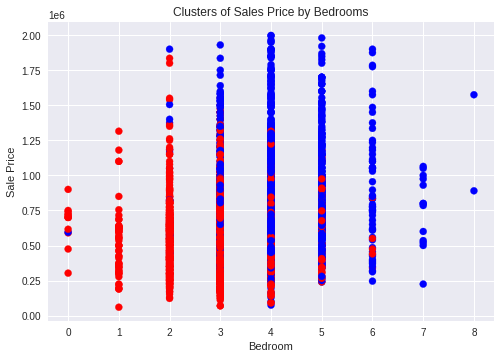

In [385]:
#Generate visualization to see the clusters based on Sales Price and Bedrooms
colors = {1: 'red', 0: 'blue'}
plt.scatter(df1['Bedrooms'], df1['SalePrice'], c = df1['cluster'].map(colors))
plt.ylabel('Sale Price')
plt.xlabel('Bedroom')
plt.title('Clusters of Sales Price by Bedrooms')
plt.show()

From the visualization above, it seems the houses in cluster 0 are more expensive than the houses in cluster 1. I'll generate a bar plot to investigate this trend

In [386]:
#get the average Sales Price for each cluster
mean_1 = (df1.loc[df1['cluster'] == 1, 'SalePrice']).mean() #Average Sales for Cluster 1
mean_0 = (df1.loc[df1['cluster'] == 0, 'SalePrice']).mean() #Average Sales for Cluster 0

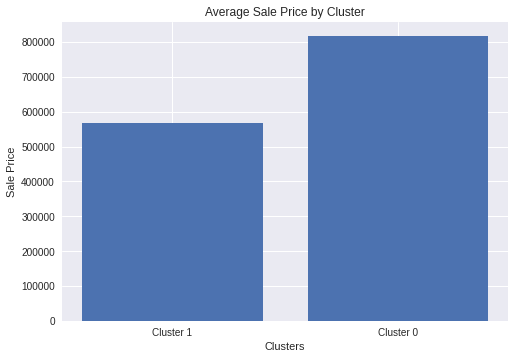

In [387]:
#generate bar plot to compare average Sales Price for each cluster
averages = (mean_1, mean_0)
Clusters = ['Cluster 1', 'Cluster 0']
plt.bar(Clusters, averages)
plt.xlabel('Clusters')
plt.ylabel('Sale Price')
plt.title('Average Sale Price by Cluster');

Bar plot confirms that average sales price for houses in cluster 0 is higher than for houses in cluster 1 

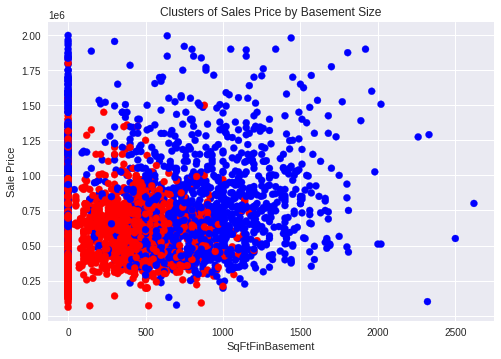

In [388]:
#Generate visualization to see the clusters based on Sales Price and SqftinBasement
plt.scatter(df1['SqFtFinBasement'], df1['SalePrice'], c = df1['cluster'].map(colors))
plt.ylabel('Sale Price')
plt.xlabel('SqFtFinBasement')
plt.title('Clusters of Sales Price by Basement Size')
plt.show()

The clustering seems to suggest that there's a correlation between sales price and basement size, i.e., it seems the higher the basement size, the higher the sales price

### **Part 2: Modeling**

**Data Exploration and Processing**

In [389]:
df2 = pd.read_csv('/content/option_A_modeling_df - option_A_modeling_df.csv')
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,PcntComplete,Longitude,Latitude,Golf Course,Other Great Outdoors,Elementary School,General Entertainment,Park,Mexican Restaurant,Vietnamese Restaurant,Gas Station,Housing Development,Playground,Pool,Church,Dive Bar,Convenience Store,Middle School,Grocery Store,Brewery,...,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,Condition_2,Condition_3,Condition_4,Condition_5,MonthSold_02,MonthSold_03,MonthSold_04,MonthSold_05,MonthSold_06,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,0,-122.196399,47.336118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,0,-122.361913,47.509874,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,0,-122.156684,47.437557,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,0,-122.370252,47.565146,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,0,-122.184194,47.730389,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [390]:
#split data into X and y variables
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']

In [391]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [392]:
#convert data to numpy arrays so as to be able to feed it into a neural network
my_data = (X_train, X_test, y_train, y_test)
for i in my_data:
  i = i.to_numpy()

In [393]:
#instantiate standard scaler and scale date
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [394]:
#instantiate and fit PCA to leverage components that explains 95% of the variance in the data
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [395]:
#get number of components after PCA
print('Number of components after PCA is', X_train.shape[1])

Number of components after PCA is 143


**Modeling**

In [396]:
#define model
model = Sequential()

#instantiate input shape
input_shape = X_train.shape[1]

In [397]:
#Plotting model performance for evaluation. Code adapted from class material of week 11
def plot_history(history, metric=None):
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = 'train')
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].set_xlabel('epochs')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].set_xlabel('epochs')
    axes[1].legend()

  plt.show()

Model 1

In [398]:
#define model architecture. This is the architecture for the three models I'll be building
model.add(layers.Dense(32, 
                       activation='relu',
                       input_shape=(input_shape,)))
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dense(1))

In [399]:
#compile model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [400]:
#fit model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100)

Epoch 1/100
124/124 [==============================] - 1s 3ms/step - loss: 532355153920.0000 - mae: 665700.1875 - val_loss: 522156146688.0000 - val_mae: 659656.1875
Epoch 2/100
124/124 [==============================] - 0s 2ms/step - loss: 532319436800.0000 - mae: 665676.1875 - val_loss: 522092216320.0000 - val_mae: 659613.7500
Epoch 3/100
124/124 [==============================] - 0s 3ms/step - loss: 532202422272.0000 - mae: 665601.1250 - val_loss: 521910288384.0000 - val_mae: 659497.5000
Epoch 4/100
124/124 [==============================] - 0s 2ms/step - loss: 531922780160.0000 - mae: 665429.6250 - val_loss: 521536962560.0000 - val_mae: 659265.9375
Epoch 5/100
124/124 [==============================] - 0s 3ms/step - loss: 531407765504.0000 - mae: 665122.0000 - val_loss: 520909881344.0000 - val_mae: 658884.3125
Epoch 6/100
124/124 [==============================] - 0s 3ms/step - loss: 530603180032.0000 - mae: 664645.8750 - val_loss: 519980122112.0000 - val_mae: 658324.6875
Epoch 7/10

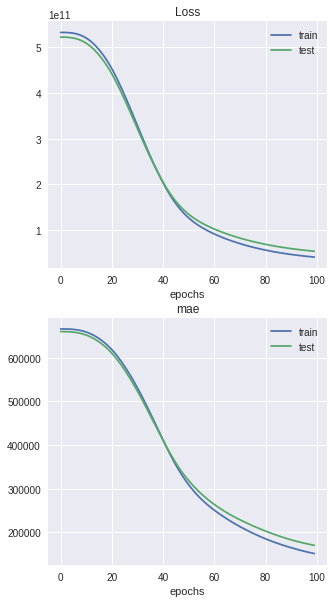

In [401]:
#evaluate how Model 1 is doing 
plot_history(history, 'mae')

From the plot above, the model seems not to be overfitting. However, ut also seems that the model is still learning since loss and mae still seems to be falling. So I'll increase the number of epochs to 200 for a model I'll call Model 2.







Model 2

In [402]:
#fit Model 2 with 200 epochs
history_2 = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200)

Epoch 1/200
124/124 [==============================] - 0s 3ms/step - loss: 40033144832.0000 - mae: 149753.0312 - val_loss: 52811644928.0000 - val_mae: 168555.8438
Epoch 2/200
124/124 [==============================] - 0s 3ms/step - loss: 39551733760.0000 - mae: 148506.4844 - val_loss: 52332077056.0000 - val_mae: 167403.7500
Epoch 3/200
124/124 [==============================] - 0s 2ms/step - loss: 39104643072.0000 - mae: 147376.6719 - val_loss: 51882455040.0000 - val_mae: 166303.4531
Epoch 4/200
124/124 [==============================] - 0s 2ms/step - loss: 38677897216.0000 - mae: 146349.1250 - val_loss: 51423629312.0000 - val_mae: 165164.7969
Epoch 5/200
124/124 [==============================] - 0s 3ms/step - loss: 38269317120.0000 - mae: 145290.6562 - val_loss: 51015675904.0000 - val_mae: 164149.9688
Epoch 6/200
124/124 [==============================] - 0s 2ms/step - loss: 37871779840.0000 - mae: 144274.4375 - val_loss: 50613329920.0000 - val_mae: 163192.4844
Epoch 7/200
124/124 [=

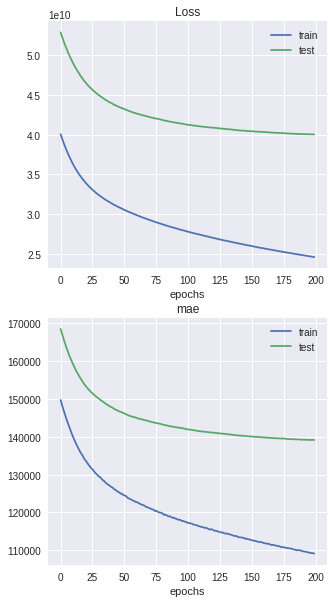

In [403]:
#evaluate how Model 2 is doing 
plot_history(history_2, 'mae')

Based on the plot above, the model is overfitting when epoch is increased to 200. For Model 3, I will try early stopping to regularize Model 2 still with 200 epochs

Model 3

In [404]:
#instantiate early stopping
early_stopping = EarlyStopping(patience=10)

#fit model with 200 epochs and early stopping
history_3 = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    callbacks=[early_stopping])

Epoch 1/200
124/124 [==============================] - 0s 3ms/step - loss: 24589490176.0000 - mae: 109029.8984 - val_loss: 40018026496.0000 - val_mae: 139218.7188
Epoch 2/200
124/124 [==============================] - 0s 3ms/step - loss: 24562831360.0000 - mae: 108984.6406 - val_loss: 40006021120.0000 - val_mae: 139170.7969
Epoch 3/200
124/124 [==============================] - 0s 2ms/step - loss: 24526030848.0000 - mae: 108981.8516 - val_loss: 39987703808.0000 - val_mae: 139154.1719
Epoch 4/200
124/124 [==============================] - 0s 2ms/step - loss: 24510601216.0000 - mae: 108871.9375 - val_loss: 39990206464.0000 - val_mae: 139132.6094
Epoch 5/200
124/124 [==============================] - 0s 2ms/step - loss: 24482435072.0000 - mae: 108798.8594 - val_loss: 39983046656.0000 - val_mae: 139120.1094
Epoch 6/200
124/124 [==============================] - 0s 3ms/step - loss: 24457865216.0000 - mae: 108800.4688 - val_loss: 39970631680.0000 - val_mae: 139102.8750
Epoch 7/200
124/124 [=

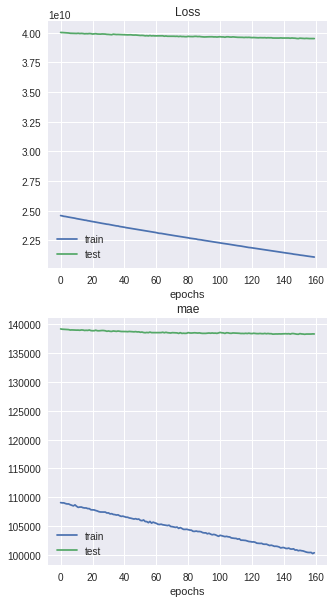

In [405]:
#evaluate how Model 3 is doing 
plot_history(history_3, 'mae')

Model 3 with early stopping is badly overfitting and it seems worse than Model 2.

Based on the performance of the models, Model 1 seems to be the best because it does nnot overfit the test data. We will discard both Models 2 and 3 because they're overfitting the test data